# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Afifah Nuraini Majid
- **Email:** m312b4kx0157@bangkit.academy
- **ID Dicoding:** afifanuraaini

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?
- Pada jam berapa penyewaan sepeda mencapai puncaknya dalam periode tertentu?
- Berapa banyak orang yang lebih memilih untuk mendaftar sebagai pengguna terdaftar dibandingkan dengan hanya melakukan penyewaan secara kasual?

## Import Semua Packages/Library yang Digunakan

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats

## Data Wrangling

### Gathering Data

In [88]:
day_df=pd.read_csv('C:/Users/ASUS/Downloads/archive (1)/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [89]:
hour_df=pd.read_csv('C:/Users/ASUS/Downloads/archive (1)/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
Dataset hour.csv terdiri dari 17 kolom dengan total 17.379 baris. Sementara itu, dataset day.csv memiliki jumlah kolom yang sama, yaitu 17 kolom, namun dengan total 731 baris.

### Assessing Data

In [90]:
day_df.info()
day_df.describe()
print("jumlah duplikasi : ",day_df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
jumlah duplikasi :  instant       0
dteday        0
season        0
yr            0
mnth     

In [91]:
hour_df.info()
hour_df.describe()
print("jumlah duplikasi : ",hour_df.isna().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
jumlah duplikasi :  instant       0
dteday       

**Insight:**
- Terlihat bahwa tidak terdapat missing value dalam dataframe **hour_df** dan **day_df**. 
- Dapat dipastikan bahwa tidak ada data yang terduplikasi.

### Cleaning Data

### Dropping

In [92]:
#Kita akan menghapus kolom instant dan workingday. Menurut saya, kolom workingday sudah diwakili oleh kolom weekday, dan kolom instant tidak memiliki relevansi dengan analisis. 
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)

In [93]:
# Kita akan mengubah tipe data dteday dari 'object' menjadi 'datetime' untuk penanganan yang lebih tepat.
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [94]:
# Mengganti nama kolom pada data set day_df
day_df.rename(columns={'yr':'year','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [95]:
# Mengganti nama kolom pada dataset hour_df
hour_df.rename(columns={'yr':'year','hr':'hours','mnth':'month','weekday':'one_of_week', 'weathersit':'weather_situation','windspeed':'wind_speed','cnt':'count_cr','hum':'humidity'},inplace=True)

In [96]:

one_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else: 
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [97]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

**Insight:**
- Penghapusan Kolom: Kolom instant dan workingday dihapus karena dianggap tidak relevan untuk analisis lebih lanjut. Selain itu, kolom workingday sudah terwakili oleh kolom weekday.

- Perubahan Tipe Data: Tipe data pada kolom dteday diubah dari 'object' menjadi 'datetime' untuk memudahkan proses analisis dan penanganan data tanggal.

- Penggantian Nama Kolom: Nama-nama kolom pada dataset day_df dan hour_df diubah menjadi lebih deskriptif dan mudah dipahami, seperti mengganti 'yr' menjadi 'year', 'mnth' menjadi 'month', dan 'cnt' menjadi 'count_cr'.

- Penambahan Kolom Kategori: Kolom baru bernama category_days ditambahkan untuk mengelompokkan hari menjadi 'weekend' atau 'weekdays', berdasarkan nilai di kolom one_of_week.

## Exploratory Data Analysis (EDA)

### Explore ...

In [98]:
hour_df.describe(include="all")

,instant,dteday,season,year,month,hours,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu kering
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17379,17379
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [ ]:
# Memisahkan data antara hari kerja dan akhir pekan
workingday_data =day_df[day_df['workingday'] == 1]  # Data hari kerja
weekend_data =day_df[day_df['workingday'] == 0]     # Data akhir pekan

# Menghitung rata-rata penggunaan sepeda pada hari kerja dan akhir pekan
avg_workingday = workingday_data['cnt'].mean()
avg_weekend = weekend_data['cnt'].mean()

In [108]:
print(f'rata-rata pengguna sepeda pada hari kerja: {avg_workingday:.2f}')
print(f'rata-rata pengguna sepeda pada akhir pekan: {avg_weekend:.2f}')

rata-rata pengguna sepeda pada hari kerja: 193.21
rata-rata pengguna sepeda pada akhir pekan: 181.41


In [109]:
hour_df.groupby(by="hours").agg({
    "count_cr": ["sum"]
})

,count_cr
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


In [110]:
day_df.describe(include="all")

,instant,dteday,season,year,month,holiday,one_of_week,weather_situation,temp,atemp,humidity,wind_speed,casual,registered,count_cr,category_days,humidity_category
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu kering
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,731,731
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


In [111]:
day_df.groupby(by="year").agg({
    "registered": ["sum"],
    "casual": ["sum"]
})

,registered,casual
,sum,sum
year,,
0,995851,247252
1,1676811,372765


Berdasarkan gambar di atas, terlihat adanya perbedaan yang cukup mencolok antara jumlah penyewaan sepeda oleh pengguna yang terdaftar sebagai member dan yang belum terdaftar. Pada tahun 2011, total penyewaan sepeda oleh member mencapai 995.851, sedangkan penyewaan oleh pengguna non-member hanya sebanyak 247.252. Hal ini menunjukkan bahwa pengguna yang telah menjadi member jauh lebih aktif dalam melakukan penyewaan sepeda dibandingkan dengan pengguna yang belum mendaftar.

Selain itu, dari gambar tersebut juga dapat diamati bahwa minat penyewaan sepeda cenderung menurun pada hari libur atau tanggal merah. Jumlah penyewaan sepeda pada hari libur lebih rendah jika dibandingkan dengan hari-hari kerja. Hal ini mungkin disebabkan oleh perubahan pola aktivitas dan kebutuhan transportasi pada akhir pekan dan hari libur.

## Visualization & Explanatory Analysis

### Bagaimana perbedaan pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?

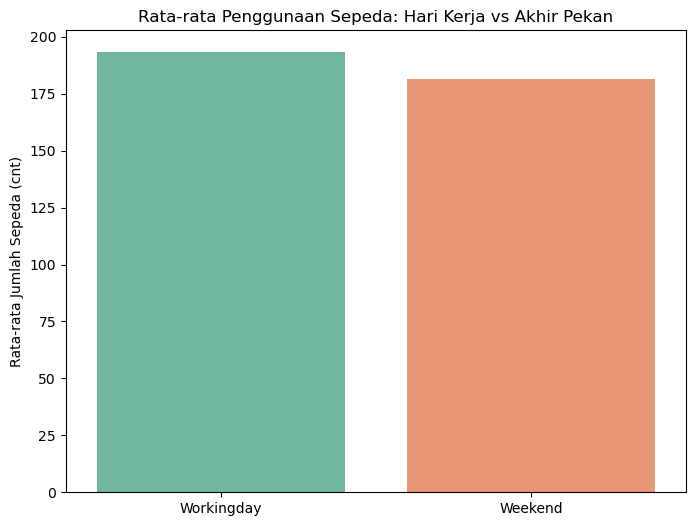

In [113]:
plt.figure(figsize=(8, 6))
sns.barplot(x=['Workingday', 'Weekend'], y=[avg_workingday, avg_weekend], palette='Set2')
plt.title('Rata-rata Penggunaan Sepeda: Hari Kerja vs Akhir Pekan')
plt.ylabel('Rata-rata Jumlah Sepeda (cnt)')
plt.show()

Visualisasi ini menunjukkan bahwa rata-rata penggunaan sepeda lebih besar pada hari kerja, yang mengindikasikan tren bahwa sepeda mungkin lebih banyak digunakan untuk keperluan komuter atau aktivitas rutin selama hari kerja. Namun, perbedaan rata-rata antara hari kerja dan akhir pekan tidak terlalu besar, yang berarti pola penggunaan sepeda relatif konsisten sepanjang minggu.

### Pada jam berapa penyewaan sepeda mencapai puncaknya dalam periode tertentu?

In [114]:
sum_order_items_df = hour_df.groupby("hours").count_cr.sum().sort_values(ascending=False).reset_index()

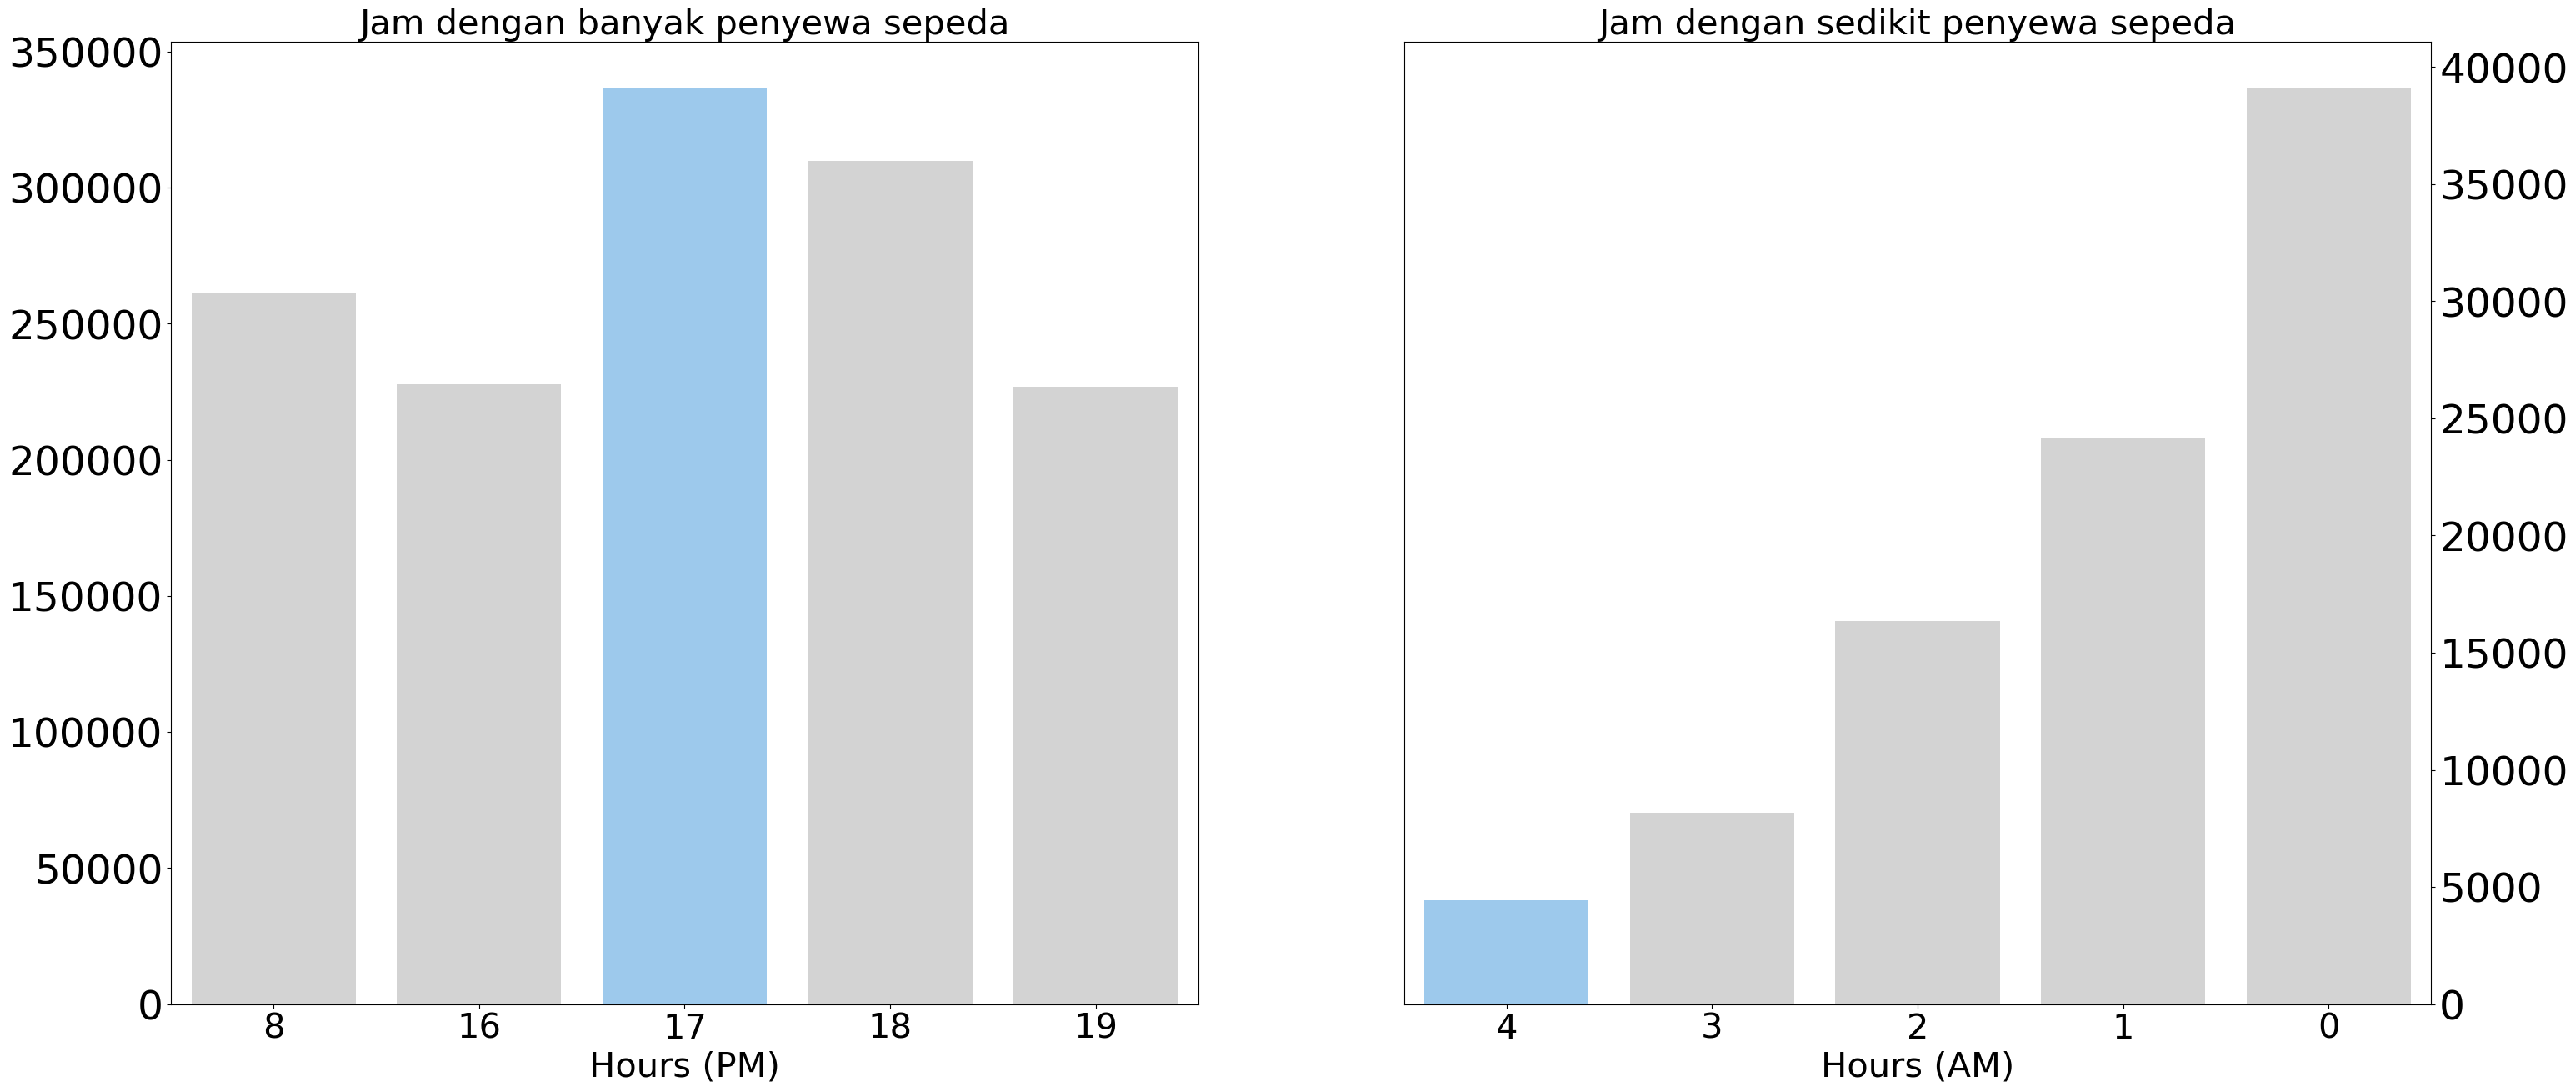

In [117]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.head(5), palette=["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3", "#D3D3D3"], ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours (PM)", fontsize=30)
ax[0].set_title("Jam dengan banyak penyewa sepeda", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)
sns.barplot(x="hours", y="count_cr", data=sum_order_items_df.sort_values(by="hours", ascending=True).head(5), palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3","#90CAF9"], ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours (AM)",  fontsize=30)
ax[1].set_title("Jam dengan sedikit penyewa sepeda", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

plt.show()

- Jam dengan Banyak Penyewa Sepeda: Grafik sebelah kiri menunjukkan jam-jam di mana penyewaan sepeda mencapai puncaknya. Terlihat bahwa jam 16:00 (4 PM) dan 17:00 (5 PM) adalah waktu dengan jumlah penyewaan sepeda tertinggi, dengan puncak tertinggi terjadi pada pukul 17:00. Hal ini kemungkinan disebabkan oleh pengguna yang menggunakan sepeda untuk perjalanan pulang kerja atau aktivitas sore hari lainnya.

- Jam dengan Sedikit Penyewa Sepeda: Grafik sebelah kanan menunjukkan jam-jam dengan jumlah penyewaan sepeda paling sedikit. Puncak terendah terjadi pada jam 4:00 (4 AM) dan diikuti oleh jam 3:00 (3 AM). Rendahnya jumlah penyewaan pada jam-jam tersebut dapat dikaitkan dengan waktu istirahat atau tidur, di mana aktivitas penyewaan sepeda sangat jarang.

Secara keseluruhan, visualisasi ini mengindikasikan pola penyewaan sepeda yang meningkat pada sore hari, terutama pada jam-jam sibuk pulang kerja, dan sangat rendah pada dini hari saat kebanyakan orang sedang beristirahat.

### Berapa banyak orang yang lebih memilih untuk mendaftar sebagai pengguna terdaftar dibandingkan dengan hanya melakukan penyewaan secara kasual?

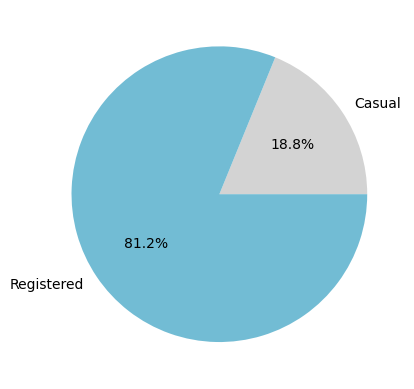

In [119]:

total_casual = sum(day_df['casual'])
total_registered = sum(day_df['registered'])
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])

plt.show()

Diagram lingkaran tersebut menunjukkan proporsi orang yang lebih memilih untuk mendaftar sebagai pengguna terdaftar dibandingkan dengan mereka yang hanya melakukan penyewaan secara kasual. Berdasarkan diagram:

- Pengguna Terdaftar: Menyumbang sebagian besar, yaitu 81,2% dari total. Hal ini menunjukkan bahwa sebagian besar orang lebih memilih manfaat atau fitur yang didapat dengan mendaftar sebagai pengguna, daripada menyewa secara kasual.
- Pengguna Kasual: Mewakili 18,8% dari total. Bagian yang lebih kecil ini menunjukkan bahwa hanya sedikit orang yang memilih untuk menyewa tanpa mendaftar.

Secara keseluruhan, visualisasi ini mengindikasikan bahwa lebih banyak orang memilih untuk mendaftar daripada hanya menyewa secara kasual, kemungkinan karena adanya keuntungan atau insentif tertentu yang didapat dari pendaftaran.

## Analisis Lanjutan (Opsional)

# Total Penggunaan Berdasarkan Kelembaban

In [120]:
hour_df.groupby(by="humidity_category").agg({
    "count_cr": ["count"]})

,count_cr
,count
humidity_category,
Terlalu kering,17379


- Data menunjukkan bahwa kategori kelembaban udara yang ditetapkan adalah "Terlalu kering."
- Total penggunaan (kemungkinan merujuk pada penggunaan sepeda, kendaraan, atau layanan lain) pada kategori kelembaban "Terlalu kering" adalah sebanyak 17.379 kali.

## Conclusion

- Bagaimana perbedaan pola penggunaan sepeda pada hari kerja dibandingkan dengan akhir pekan?
Berdasarkan visualisasi pertama menunjukkan rata-rata penggunaan sepeda yang lebih tinggi pada hari kerja dibandingkan dengan akhir pekan. Ini mengindikasikan bahwa sepeda lebih sering digunakan untuk kebutuhan komuter atau aktivitas rutin selama hari kerja. Meskipun demikian, perbedaannya tidak terlalu besar, menunjukkan bahwa pola penggunaan sepeda relatif konsisten sepanjang minggu.
- Pada jam berapa penyewaan sepeda mencapai puncaknya dalam periode tertentu?
Puncak penyewaan sepeda terjadi sekitar pukul 17:00 (5 PM), yang biasanya merupakan jam pulang kerja. Ini menunjukkan bahwa banyak pengguna menyewa sepeda pada waktu tersebut, kemungkinan untuk perjalanan pulang dari kantor atau aktivitas sore. Sebaliknya, penggunaan sepeda paling sedikit terjadi pada jam 4 AM, saat kebanyakan orang masih beristirahat.
- Berapa banyak orang yang lebih memilih untuk mendaftar sebagai pengguna terdaftar dibandingkan dengan hanya melakukan penyewaan secara kasual?
Visualisasi ketiga berupa diagram lingkaran menunjukkan bahwa 81,2% dari total pengguna memilih untuk mendaftar sebagai pengguna terdaftar, sementara hanya 18,8% yang menggunakan penyewaan secara kasual. Ini menunjukkan bahwa mayoritas orang cenderung memilih untuk menjadi pengguna terdaftar, mungkin karena manfaat atau fitur tambahan yang diperoleh dari pendaftaran.